In [1]:
import warnings

warnings.simplefilter("ignore", FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig4"
sc.settings.set_figure_params(dpi=50, dpi_save=300, facecolor="white", frameon=False, figsize=(8,8),
                                   vector_friendly=True
                             )


# Load

In [3]:
adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered.scrna')
import gc
gc.collect()
adata.obs["lvl5_annotation_new"]=adata.obs["lvl5_annotation"]

 

In [8]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


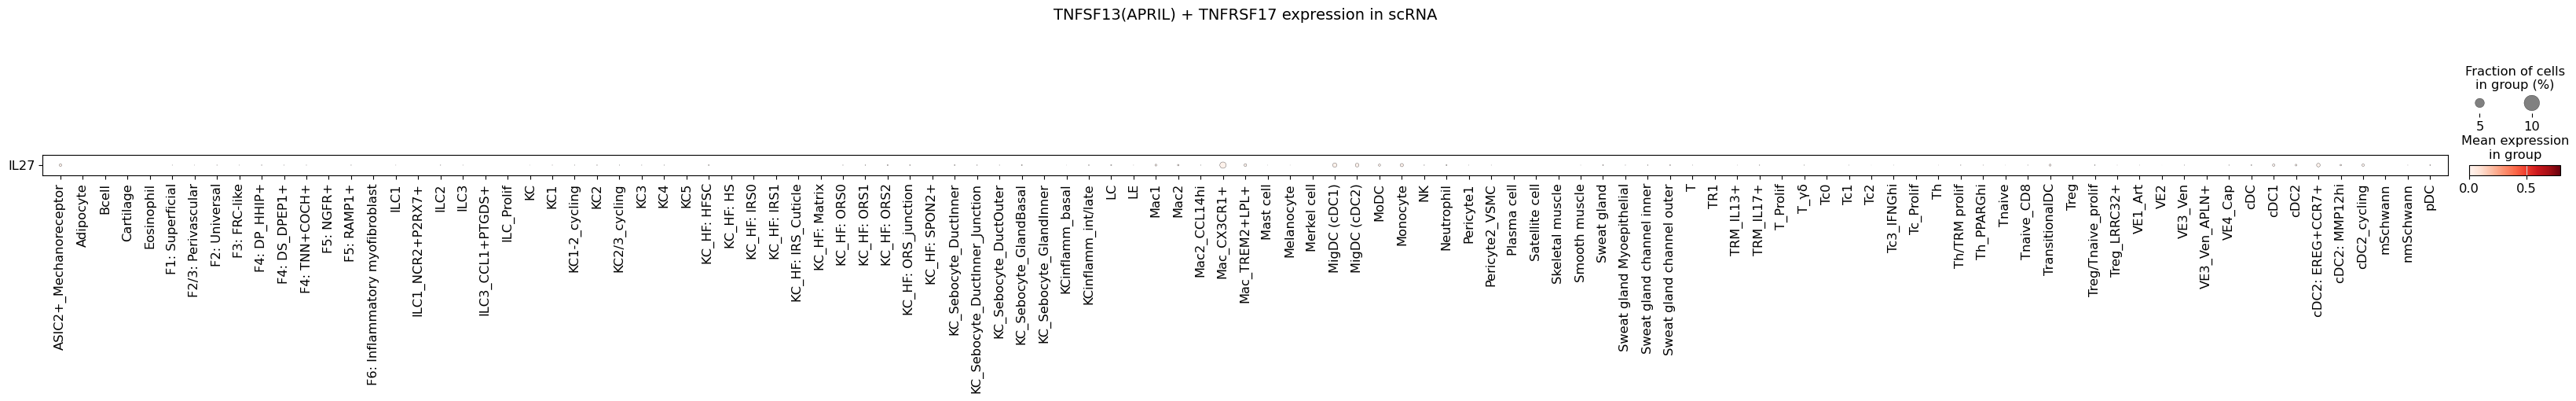

In [9]:
sc.pl.dotplot(
    adata,
     [ 'IL27', 
                  
                    ],
    groupby="lvl5_annotation",
    vmax=0.8,
    swap_axes=True,
       # dot_max=0.3,
    save='plotTNFRSF17_TNFSF13_scrna.pdf',
        title="TNFSF13(APRIL) + TNFRSF17 expression in scRNA"

    

  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


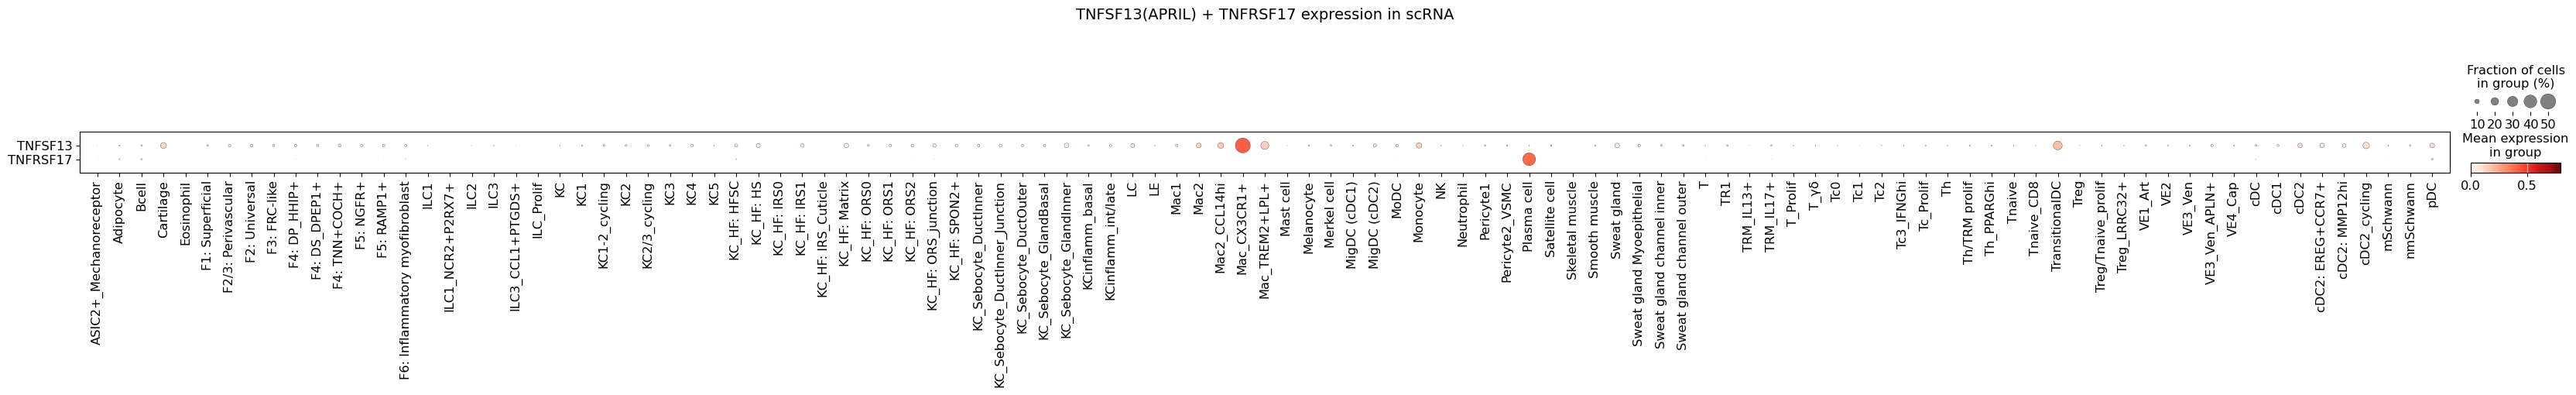

In [52]:
sc.pl.dotplot(
    adata,
     [ 'TNFSF13', 
                    'TNFRSF17'
                    ],
    groupby="lvl5_annotation",
    vmax=0.8,
    swap_axes=True,
       # dot_max=0.3,
    save='plotTNFRSF17_TNFSF13_scrna.pdf',
        title="TNFSF13(APRIL) + TNFRSF17 expression in scRNA"

    

  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


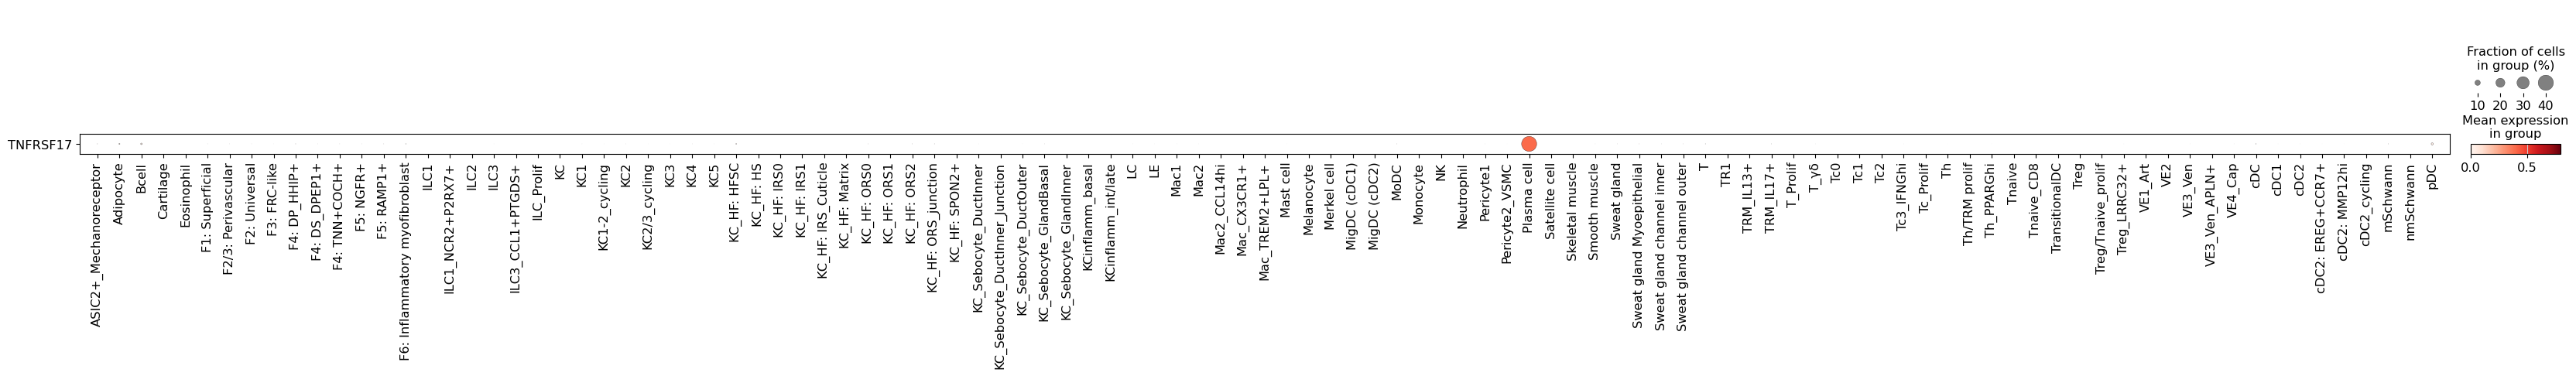

In [8]:
sc.pl.dotplot(
    adata,
     [
                    'TNFRSF17'
                    ],
    groupby="lvl5_annotation",
    vmax=0.8,
    swap_axes=True,
       # dot_max=0.3,

    save='plotTNFRSF17.pdf'
)


In [ ]:
# sc.pl.dotplot(
#     adata,
#      [
#                     'TNFRSF17'
#                     ],
#     groupby="lvl5_annotation",
#     vmax=0.8,
#     swap_axes=True
#        # dot_max=0.3,

#     save='plotTNFRSF17.pdf'
# )


In [4]:
adata_plasma=adata[(adata.obs["lvl5_annotation"]=="Plasma cell")|
                  (adata.obs["lvl5_annotation"]=="Bcell")
                  ]
adata_plasma.shape



(2825, 32732)

In [5]:
sc.pp.normalize_total(adata_plasma, target_sum=1e4)
sc.pp.log1p(adata_plasma)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [6]:
adata_plasma_l = adata_plasma[(adata_plasma.obs["Site_status"]=="Week 12")|
                              (adata_plasma.obs["Site_status"]=="Lesional")|
                              (adata_plasma.obs["Site_status"].str.startswith("3D"))|
                               (adata_plasma.obs["Site_status"]=="Psoriasis_replicate_Lesional")
                              
                               ]
adata_plasma_l.obs["t"] = adata_plasma_l.obs["lvl5_annotation"].astype(str)+"_" + adata_plasma_l.obs["Patient_status"].astype(str) + adata_plasma_l.obs["Site_status"].astype(str)

{x:x for x in adata_plasma_l.obs["t"].unique()}

RENAME = {'Plasma cell_ADLesional': 'Plasma cell_AD_Lesional',
 'Bcell_ADLesional': 'Bcell_AD_Lesional',
 'Bcell_ADWeek 12': 'Bcell_AD_Week12',
 'Plasma cell_ADWeek 12': 'Plasma cell_AD_Week12',
 'Plasma cell_PsoriasisLesional': 'Plasma cell_Psoriasis_Lesional',
 'Bcell_PsoriasisLesional': 'Bcell_Psoriasis_Lesional',
 'Bcell_nanPsoriasis_replicate_Lesional': 'Bcell_Psoriasis_Lesional',
 'Plasma cell_nanPsoriasis_replicate_Lesional': 'Plasma cell_Psoriasis_Lesional',
 'Bcell_3d_Lesional_baseline3D_Lesional_baseline': 'Bcell_AD_Lesional',
 'Plasma cell_3d_Lesional_baseline3D_Lesional_baseline': 'Plasma cell_AD_Lesional',
 'Bcell_3d_Week123D_Week12': 'Bcell_AD_Week12',
 'Plasma cell_3d_Week123D_Week12': 'Plasma cell_AD_Week12',
 'Plasma cell_3d_Lesional_baseline3D_Week12': 'Plasma cell_AD_Week12',
 'Bcell_3d_Lesional_baseline3D_Week12': 'Bcell_AD_Week12'}
adata_plasma_l.obs["t2"]=adata_plasma_l.obs["t"].map(RENAME)
adata_plasma_l.obs["t2"].value_counts()
# exclude = ['Bcell_nanPsoriasis_replicate_Lesional',
           
#           ]
# adata_plasma_l=adata_plasma_l[~adata_plasma_l.obs["t"].isin(exclude)]

/tmp/ipykernel_360134/1676745639.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_plasma_l.obs["t"] = adata_plasma_l.obs["lvl5_annotation"].astype(str)+"_" + adata_plasma_l.obs["Patient_status"].astype(str) + adata_plasma_l.obs["Site_status"].astype(str)


t2
Plasma cell_AD_Lesional           151
Bcell_Psoriasis_Lesional           83
Bcell_AD_Lesional                  75
Plasma cell_Psoriasis_Lesional     65
Name: count, dtype: int64

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


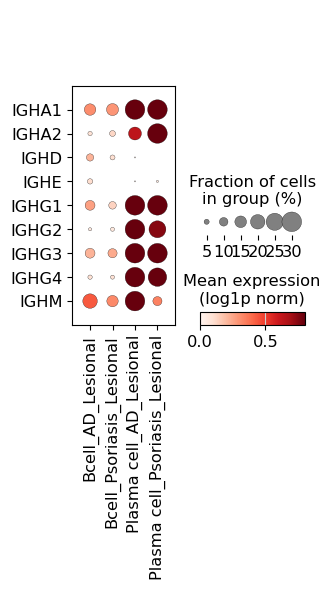

In [12]:
heavy_genes = ["IGHA1", "IGHA2", "IGHD","IGHE", "IGHG1", "IGHG2", "IGHG3", "IGHG4",  "IGHM", ]
sc.pl.dotplot(
    adata_plasma_l,
     heavy_genes,
    groupby="t2",
    vmax=0.8,
    swap_axes=True,
     dot_max=0.3,

    save='plotIGS_SCRNA.pdf',
    colorbar_title='Mean expression\n(log1p norm)'

)


/tmp/ipykernel_3979535/790524235.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_plasma.obs["t"] = adata_plasma.obs["lvl5_annotation"].astype(str)+"_" + adata_plasma.obs["Patient_status"].astype(str)
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/anndata/_core/anndata.py:1146: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


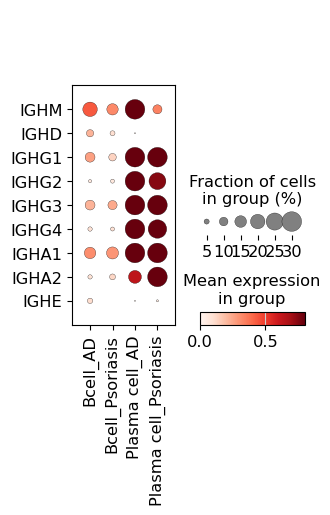

In [61]:

adata_plasma.obs["t"] = adata_plasma.obs["lvl5_annotation"].astype(str)+"_" + adata_plasma.obs["Patient_status"].astype(str)
heavy_genes = ["IGHM", "IGHD", "IGHG1", "IGHG2", "IGHG3", "IGHG4", "IGHA1", "IGHA2", "IGHE"]
sc.pl.dotplot(
    adata_plasma[adata_plasma.obs["Site_status_binary"]=="Lesional"],
     heavy_genes,
    groupby="t",
    vmax=0.8,
    swap_axes=True,
     dot_max=0.3,

    save='plotIGS.pdf',

)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


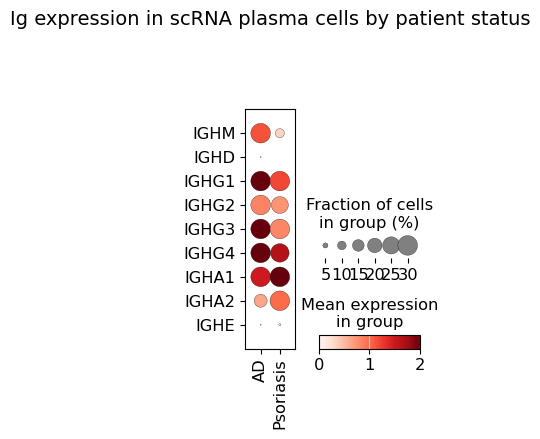

In [57]:
# heavy_genes = ["IGHM", "IGHD", "IGHG1", "IGHG2", "IGHG3", "IGHG4", "IGHA1", "IGHA2", "IGHE"]
# sc.pl.dotplot(
#     adata_plasma[adata_plasma.obs["Site_status_binary"]=="Lesional"],
#      heavy_genes,
#     groupby="Patient_status",
#     vmax=2,
#     swap_axes=True,
#        dot_max=0.3,

#     save='plotIGS.pdf',
#     title="Ig expression in scRNA plasma cells by patient status"

# )


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


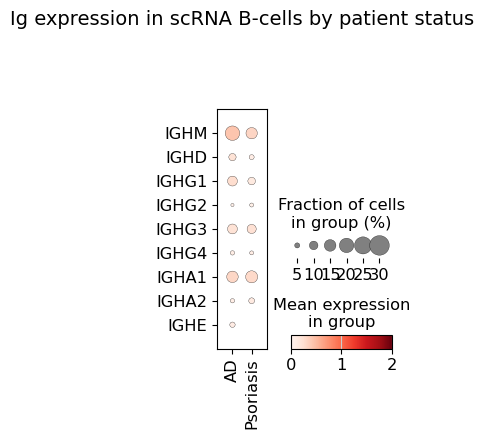

In [59]:
# adata_plasma=adata[adata.obs["lvl5_annotation"]=="Bcell"]
# adata_plasma.shape

# heavy_genes = ["IGHM", "IGHD", "IGHG1", "IGHG2", "IGHG3", "IGHG4", "IGHA1", "IGHA2", "IGHE"]
# sc.pl.dotplot(
#     adata_plasma[adata_plasma.obs["Site_status_binary"]=="Lesional"],
#      heavy_genes,
#     groupby="Patient_status",
#     vmax=2,
#     swap_axes=True,
#        dot_max=0.3,

#     save='plotIGS_Bcell.pdf',
#     title="Ig expression in scRNA B-cells by patient status"

# )


In [8]:
cell_types = [
    "cDC1",
    "Mac2",
    "T",
    "Pericyte1",
    "Ve3_Ven",
    "Plasma cell",
    #"Bcell",
    "F3: FRC-like",
    "VE1_Art",'VE3_Ven',
    "VE4_Cap",
   # 'mSchwann',
    #'nmSchwann',
    "F2/3: Perivascular"
]

ORDER = [


 'Plasma cell',
 'Sweat gland Myoepithelial',
         'Sweat gland',
          'Sweat gland channel outer',
 'Sweat gland channel inner',
 'VE1_Art','VE3_Ven',
 'VE4_Cap',
    'Mac2',
 'T',

 'cDC1',
'F3: FRC-like', "F2/3: Perivascular", 'Pericyte1', 
    
    # 'mSchwann',
   # 'nmSchwann',
]

adata=adata[(adata.obs["lvl5_annotation"].isin(cell_types))|
           (adata.obs["lvl5_annotation"].str.startswith("Sweat"))
           ].copy()


In [10]:
import gc
gc.collect()

837

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


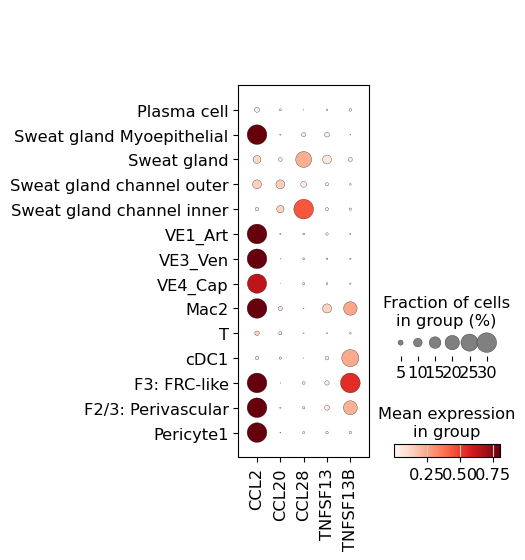

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


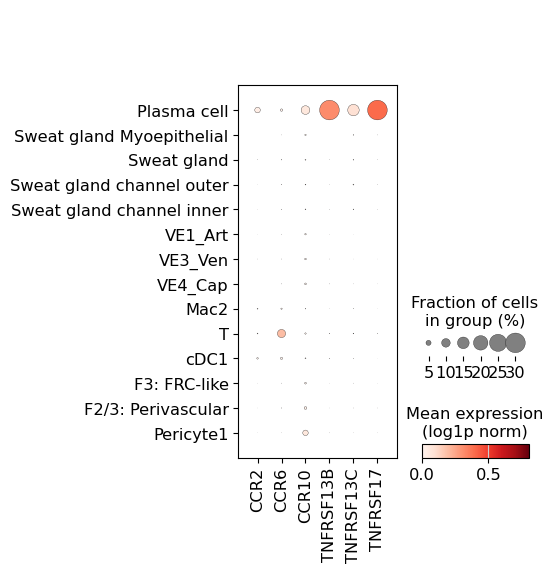

In [12]:
# adata_ii=adata[(adata.obs[CATEGORY]==("Treg"))|
#                (adata.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata.obs[CATEGORY].str.startswith("TR1"))
#                 ]
# #adata_iii=adata_ii[adata_ii.obs["disease_overall"]=="AD"]
# adata_5k_ii=adata_5k[(adata_5k.obs[CATEGORY]==("Treg"))|
#                (adata_5k.obs[CATEGORY].str.startswith("Treg_LRRC32+"))|
#                 (adata_5k.obs[CATEGORY].str.startswith("TR1"))
#                 ]


# adata_5k_ii=adata_5k_ii[adata_5k_ii.obs["Site_status"].isin(["Lesional", "Non-lesional"])]

# # for x in adata_5k_ii.obs["disease_overall"].unique():
# #     print(x)
# #     adata_5k_iii=adata_5k_ii[adata_5k_ii.obs["disease_overall"]==x]
# TREG_GENES =  { 'Treg': ['FOXP3', 'TIGIT',  "IL2RA",      'CTLA4',],
#          "Activated_Treg": ["LRRC32", "IL1R1",#"IL1R2", 
#                             "CCR8", #'TRAF3',  "ITGAV",
#                             #'CMSS1', 'LRRC32',
#                           #  'F5',# "TOX"
#                          #  'ZNF331', 'JMY', 'ELL2','NR4A3',
#                             'NR4A1',#'BICDL1',
#                            "STAT5A",

#                            ],
#               'TR1': [ #"CD69",
#                             #'IFIT3',
#                             #"SOCS1", 
#                             "CXCR3", 'EOMES', 'IL10', 'LAG3', 'HAVCR2', "PDCD1", 'FOXB1',
#          ]
#               }
# flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# TREG_GENES = {
#     'Treg': ['FOXP3', 'TIGIT', "IL2RA", 'CTLA4'],
#     "Activated_Treg": ["LRRC32", "IL1R1", "CCR8", "ITGAV"],
#     "TR1": ["LAG3", "IL10", "MIR155HG", "HAVCR2"],
# }

#flat_gene_list = [gene for genes in TREG_GENES.values() for gene in genes]

# Create dotplot
# dp = sc.pl.DotPlot(
#     adata,
#      ["CCL2", "CCL20", "CCL28", 'TNFSF13', 'TNFSF13B'],
#     groupby="lvl5_annotation",
#     vmax=0.8,
#    # categories_order=["Treg", "Treg_LRRC32+", "TR1"]
# )

# # Style it
# dp = dp.style(
#     cmap='Reds',
#     color_on='square',
#     dot_edge_color='white',
#     dot_edge_lw=1,
#     grid=False,
#     dot_max=0.6,
#     categories_order=ORDER
# )

# # Save BEFORE showing
# dp.savefig("fig5/plasma_Cell_LIGAND.pdf", dpi=300)

# # Optionally display
# #dp.show()

sc.pl.dotplot(
    adata,
     ["CCL2", "CCL20", "CCL28", 'TNFSF13', 'TNFSF13B'],
    groupby="lvl5_annotation",
    vmax=0.8,
    categories_order=ORDER,
        dot_max=0.3,

    save='4h_plasma_Cell_dotplot1.pdf'
)

sc.pl.dotplot(
    adata,
       ["CCR2", "CCR6", "CCR10", 'TNFRSF13B', 'TNFRSF13C', 'TNFRSF17'],
    groupby="lvl5_annotation",
    vmax=0.8,
    dot_max=0.3,
    categories_order=ORDER,
    colorbar_title="Mean expression\n(log1p norm)",
    save='4h_plasma_Cell_dotplot2.pdf'
)

# dp = dp.style(
#     cmap='Reds',
#     color_on='square',
#     dot_edge_color='white',
#     dot_edge_lw=1,
#     grid=False,
#     dot_max=0.6,
#     categories_order=ORDER
# )

# dp.savefig("fig5/", dpi=300)

# #dp.show()
   

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


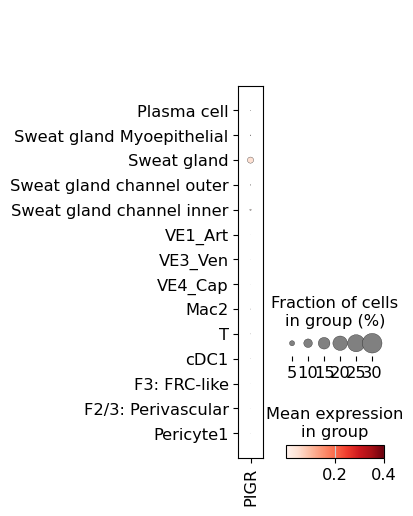

In [16]:
sc.pl.dotplot(
    adata,
     ["PIGR",],
    groupby="lvl5_annotation",
    vmax=0.4,
    categories_order=ORDER,
        dot_max=0.3,

    save='supp_plasma_Cell_PIGRscrna.pdf'
)


# xenium validation (sFig 16b)

In [3]:
import scanpy as sc
adata=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered')
import gc
gc.collect()
adata=adata[adata.obs["tech"]=="xenium"]

def remove_markers(LIST):
    try: 
        LIST = {key: [gene for gene in genes if gene in adata.var_names] 
                           for key, genes in LIST.items()}
    except: 
        LIST =[gene for gene in LIST if gene in adata.var_names]
    return LIST

 


In [ ]:

# genes = adata.var.index.tolist()

# with open("/nfs/team298/ls34/xenium_genes.pkl", "wb") as f:
#     pickle.dump(genes, f)

In [4]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
import pandas as pd

subset = adata.obs[adata.obs["niche19"].str.startswith("Plasma")]
vc = subset["lvl5_annotation"].value_counts()
vc

lvl5_annotation
Plasma cell           371
Pericyte1              27
VE3_Ven                19
Mac2                   18
F3: FRC-like           18
                     ... 
KC_HF: ORS1             0
KC_HF: ORS0             0
KC_HF: Matrix           0
KC_HF: IRS_Cuticle      0
pDC                     0
Name: count, Length: 100, dtype: int64

In [19]:
vc_filtered = vc[vc >= 10]



adata=adata[(adata.obs["niche19"].str.startswith("Plasma"))|
           (adata.obs["lvl5_annotation"].str.startswith("Sweat"))
           ]
adata=adata[(adata.obs["lvl5_annotation"].isin(vc_filtered.index.to_list()))
           |
           (adata.obs["lvl5_annotation"].str.startswith("Sweat"))].copy()
adata.obs["lvl5_annotation"].value_counts()


lvl5_annotation
Sweat gland                  25854
Sweat gland channel outer    21529
Sweat gland channel inner    11036
Sweat gland Myoepithelial     6208
Plasma cell                    371
Pericyte1                       27
VE3_Ven                         19
F3: FRC-like                    18
Mac2                            18
VE1_Art                         16
T                               14
F2/3: Perivascular              13
cDC1                            12
VE4_Cap                         10
Name: count, dtype: int64

In [20]:
sc.pl.dotplot(
    adata,
     remove_markers(["CCL2", "CCL20", "CCL28", 'TNFSF13', 'TNFSF13B']),
    groupby="lvl5_annotation",
    vmax=0.8,
    categories_order=ORDER,
        dot_max=0.3,

    save='supp16_plasma_Cell_dotplot1_XENIUM.pdf'
)

sc.pl.dotplot(
    adata,
       remove_markers(["CCR2", "CCR6", "CCR10", 'TNFRSF13B', 'TNFRSF13C', 'TNFRSF17']),
    groupby="lvl5_annotation",
    vmax=0.8,
    dot_max=0.3,
    categories_order=ORDER,
    colorbar_title="Mean expression\n(log1p norm)",
    save='supp16_plasma_Cell_dotplot2_XENIUM.pdf'
)

# dp = dp.style(
#     cmap='Reds',
#     color_on='square',
#     dot_edge_color='white',
#     dot_edge_lw=1,
#     grid=False,
#     dot_max=0.6,
#     categories_order=ORDER
# )

# dp.savefig("fig5/", dpi=300)

# #dp.show()
   

NameError: name 'ORDER' is not defined

In [ ]:

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# adata=adata[(adata.obs["niche19"].str.startswith("Plasma"))|
#            (adata.obs["lvl5_annotation"].str.startswith("Sweat"))
#            ]
adata=adata[(adata.obs["lvl5_annotation"].isin(vc_filtered.index.to_list()))
           |
           (adata.obs["lvl5_annotation"].str.startswith("Sweat"))].copy()
adata.obs["lvl5_annotation"].value_counts()


In [ ]:
sc.pl.dotplot(
    adata,
     remove_markers(["CCL2", "CCL20", "CCL28", 'TNFSF13', 'TNFSF13B']),
    groupby="lvl5_annotation",
    vmax=0.8,
    categories_order=ORDER,
        dot_max=0.3,

    save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)

sc.pl.dotplot(
    adata,
       remove_markers(["CCR2", "CCR6", "CCR10", 'TNFRSF13B', 'TNFRSF13C', 'TNFRSF17']),
    groupby="lvl5_annotation",
    vmax=0.8,
    dot_max=0.3,
    categories_order=ORDER,
    colorbar_title="Mean expression\n(log1p norm)",
    save='supp16_plasma_Cell_dotplot2_XENIUM_allcells.pdf'
)

# dp = dp.style(
#     cmap='Reds',
#     color_on='square',
#     dot_edge_color='white',
#     dot_edge_lw=1,
#     grid=False,
#     dot_max=0.6,
#     categories_order=ORDER
# )

# dp.savefig("fig5/", dpi=300)

# #dp.show()
   

In [ ]:
# sc.pl.dotplot(
#     adata,
#      remove_markers(["PIGR",]),
#     groupby="lvl5_annotation",
#     vmax=0.8,
#     categories_order=ORDER,
#         dot_max=0.6,

#     save='4k_plasma_Cell_PIGRxenium.pdf'
# )


In [ ]:
requested plot


BK23_Week 12


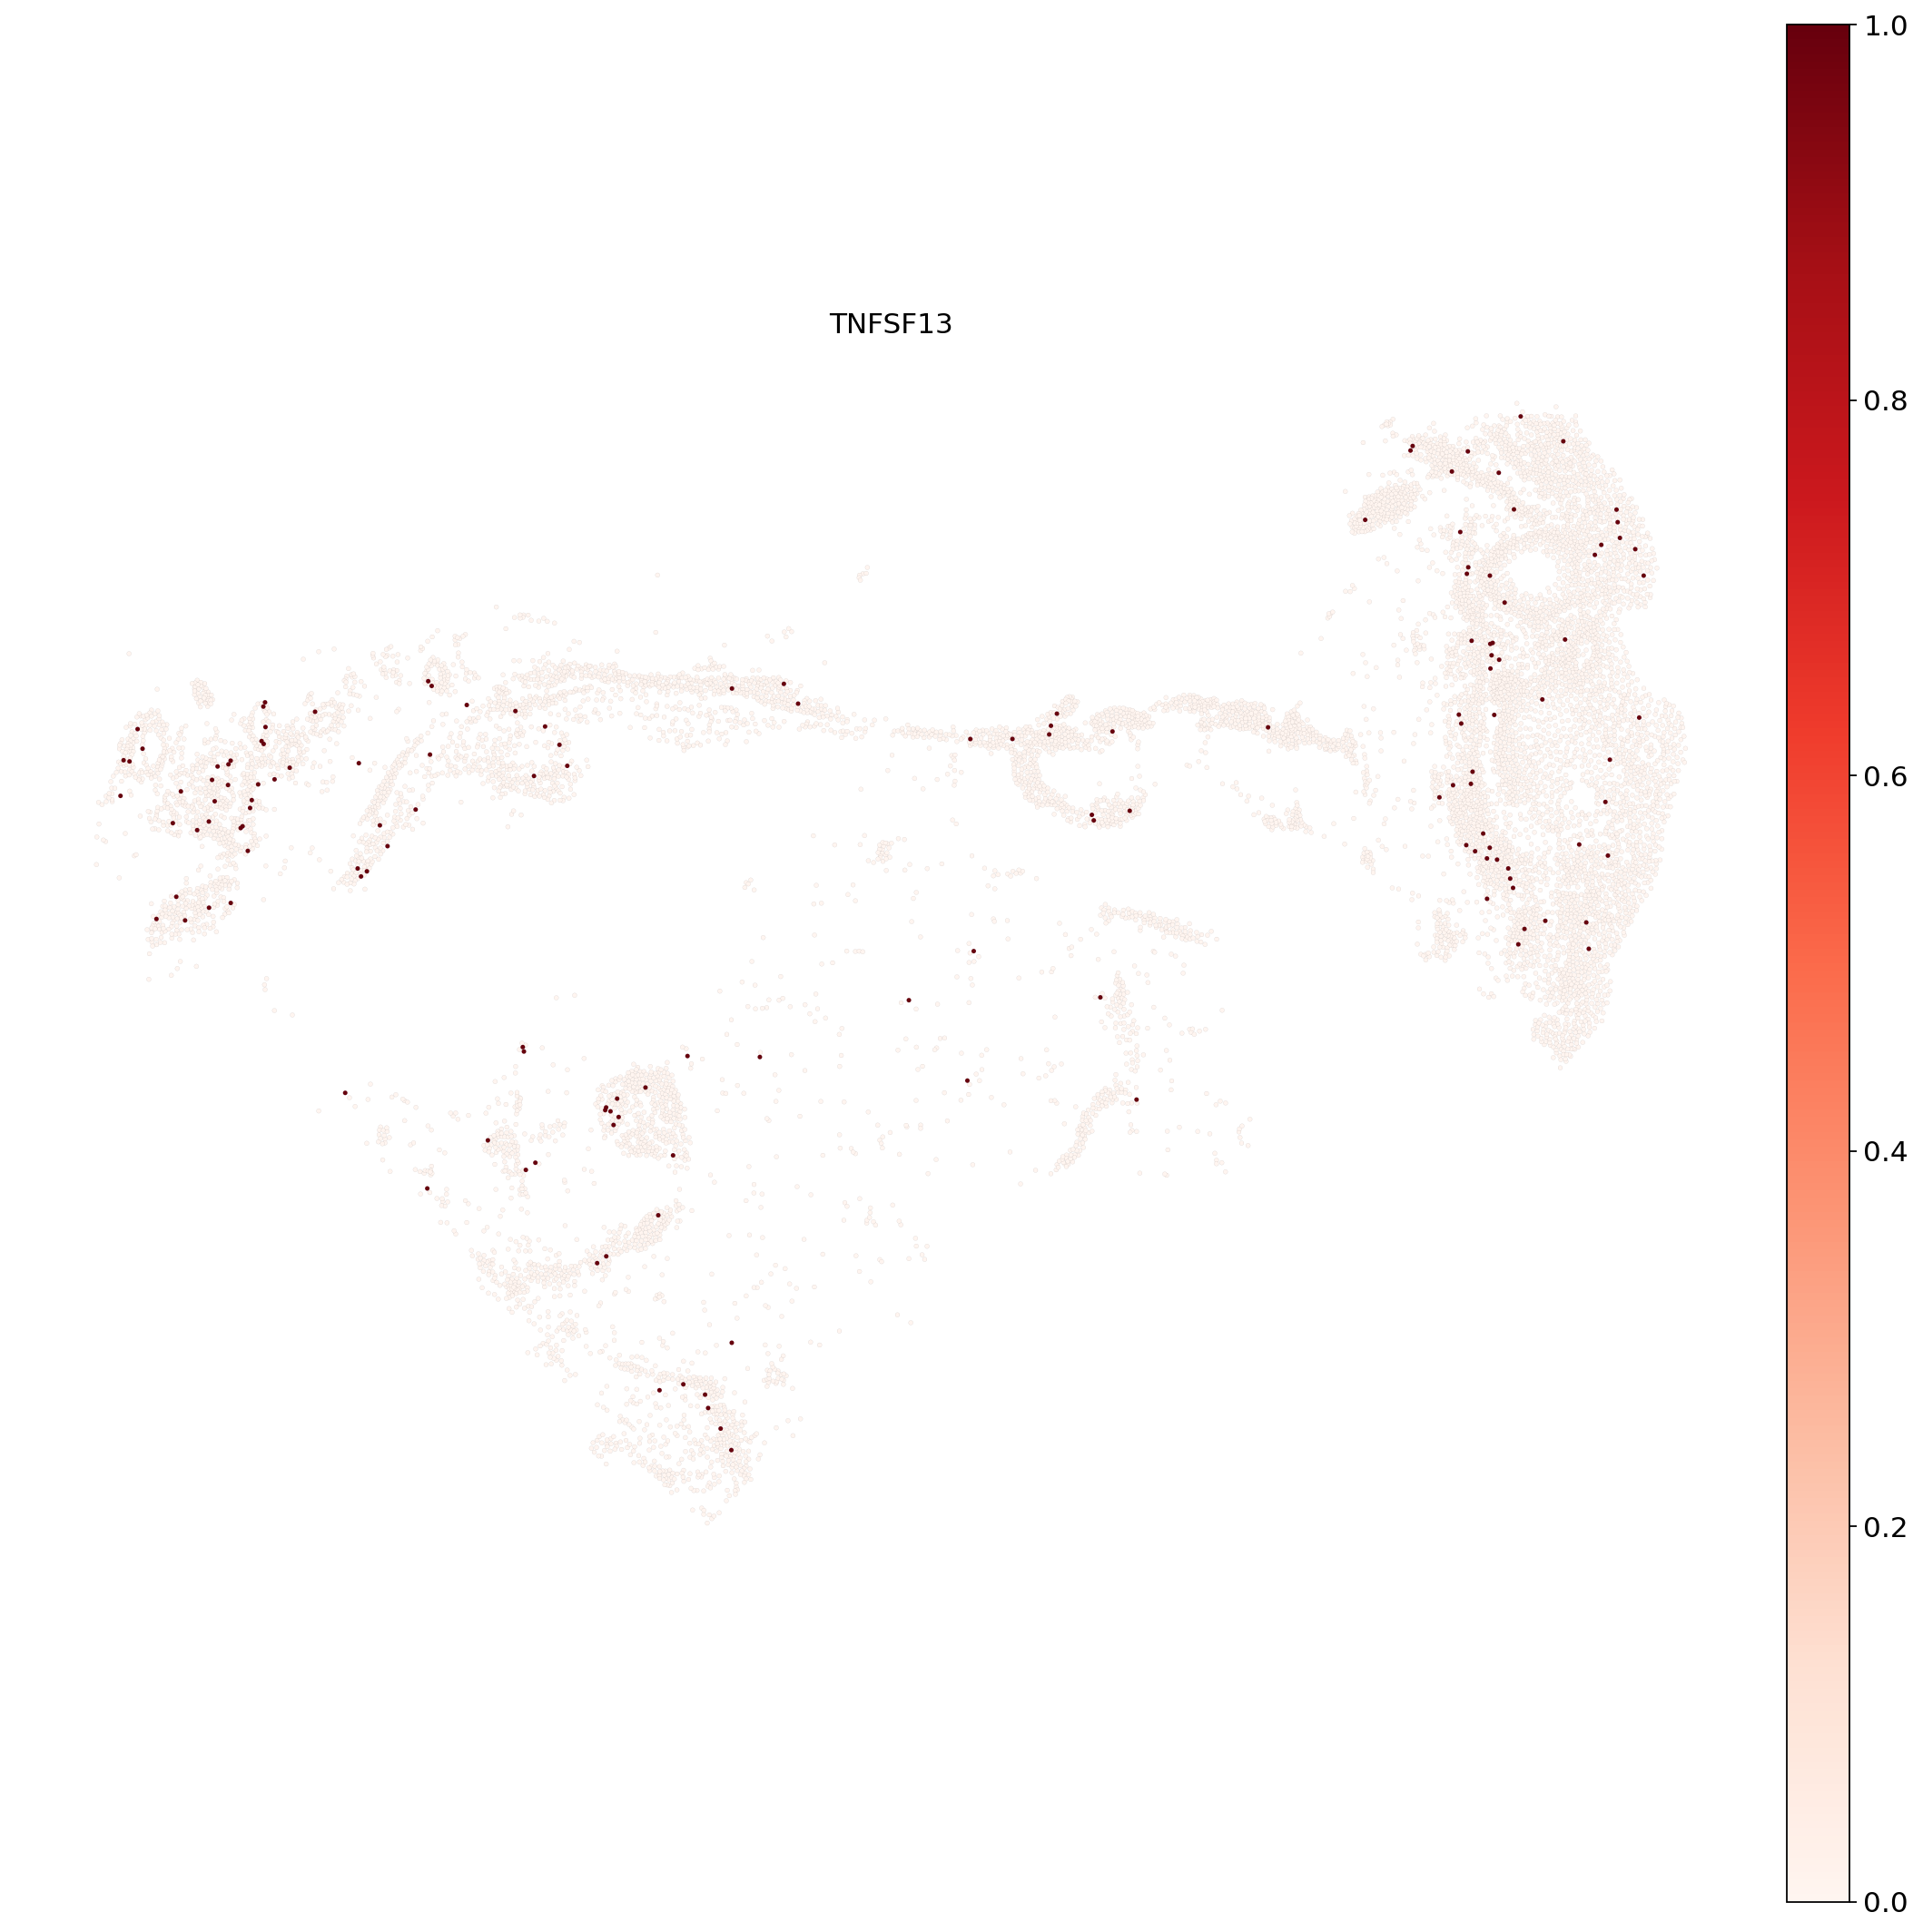

BK27_Week 12


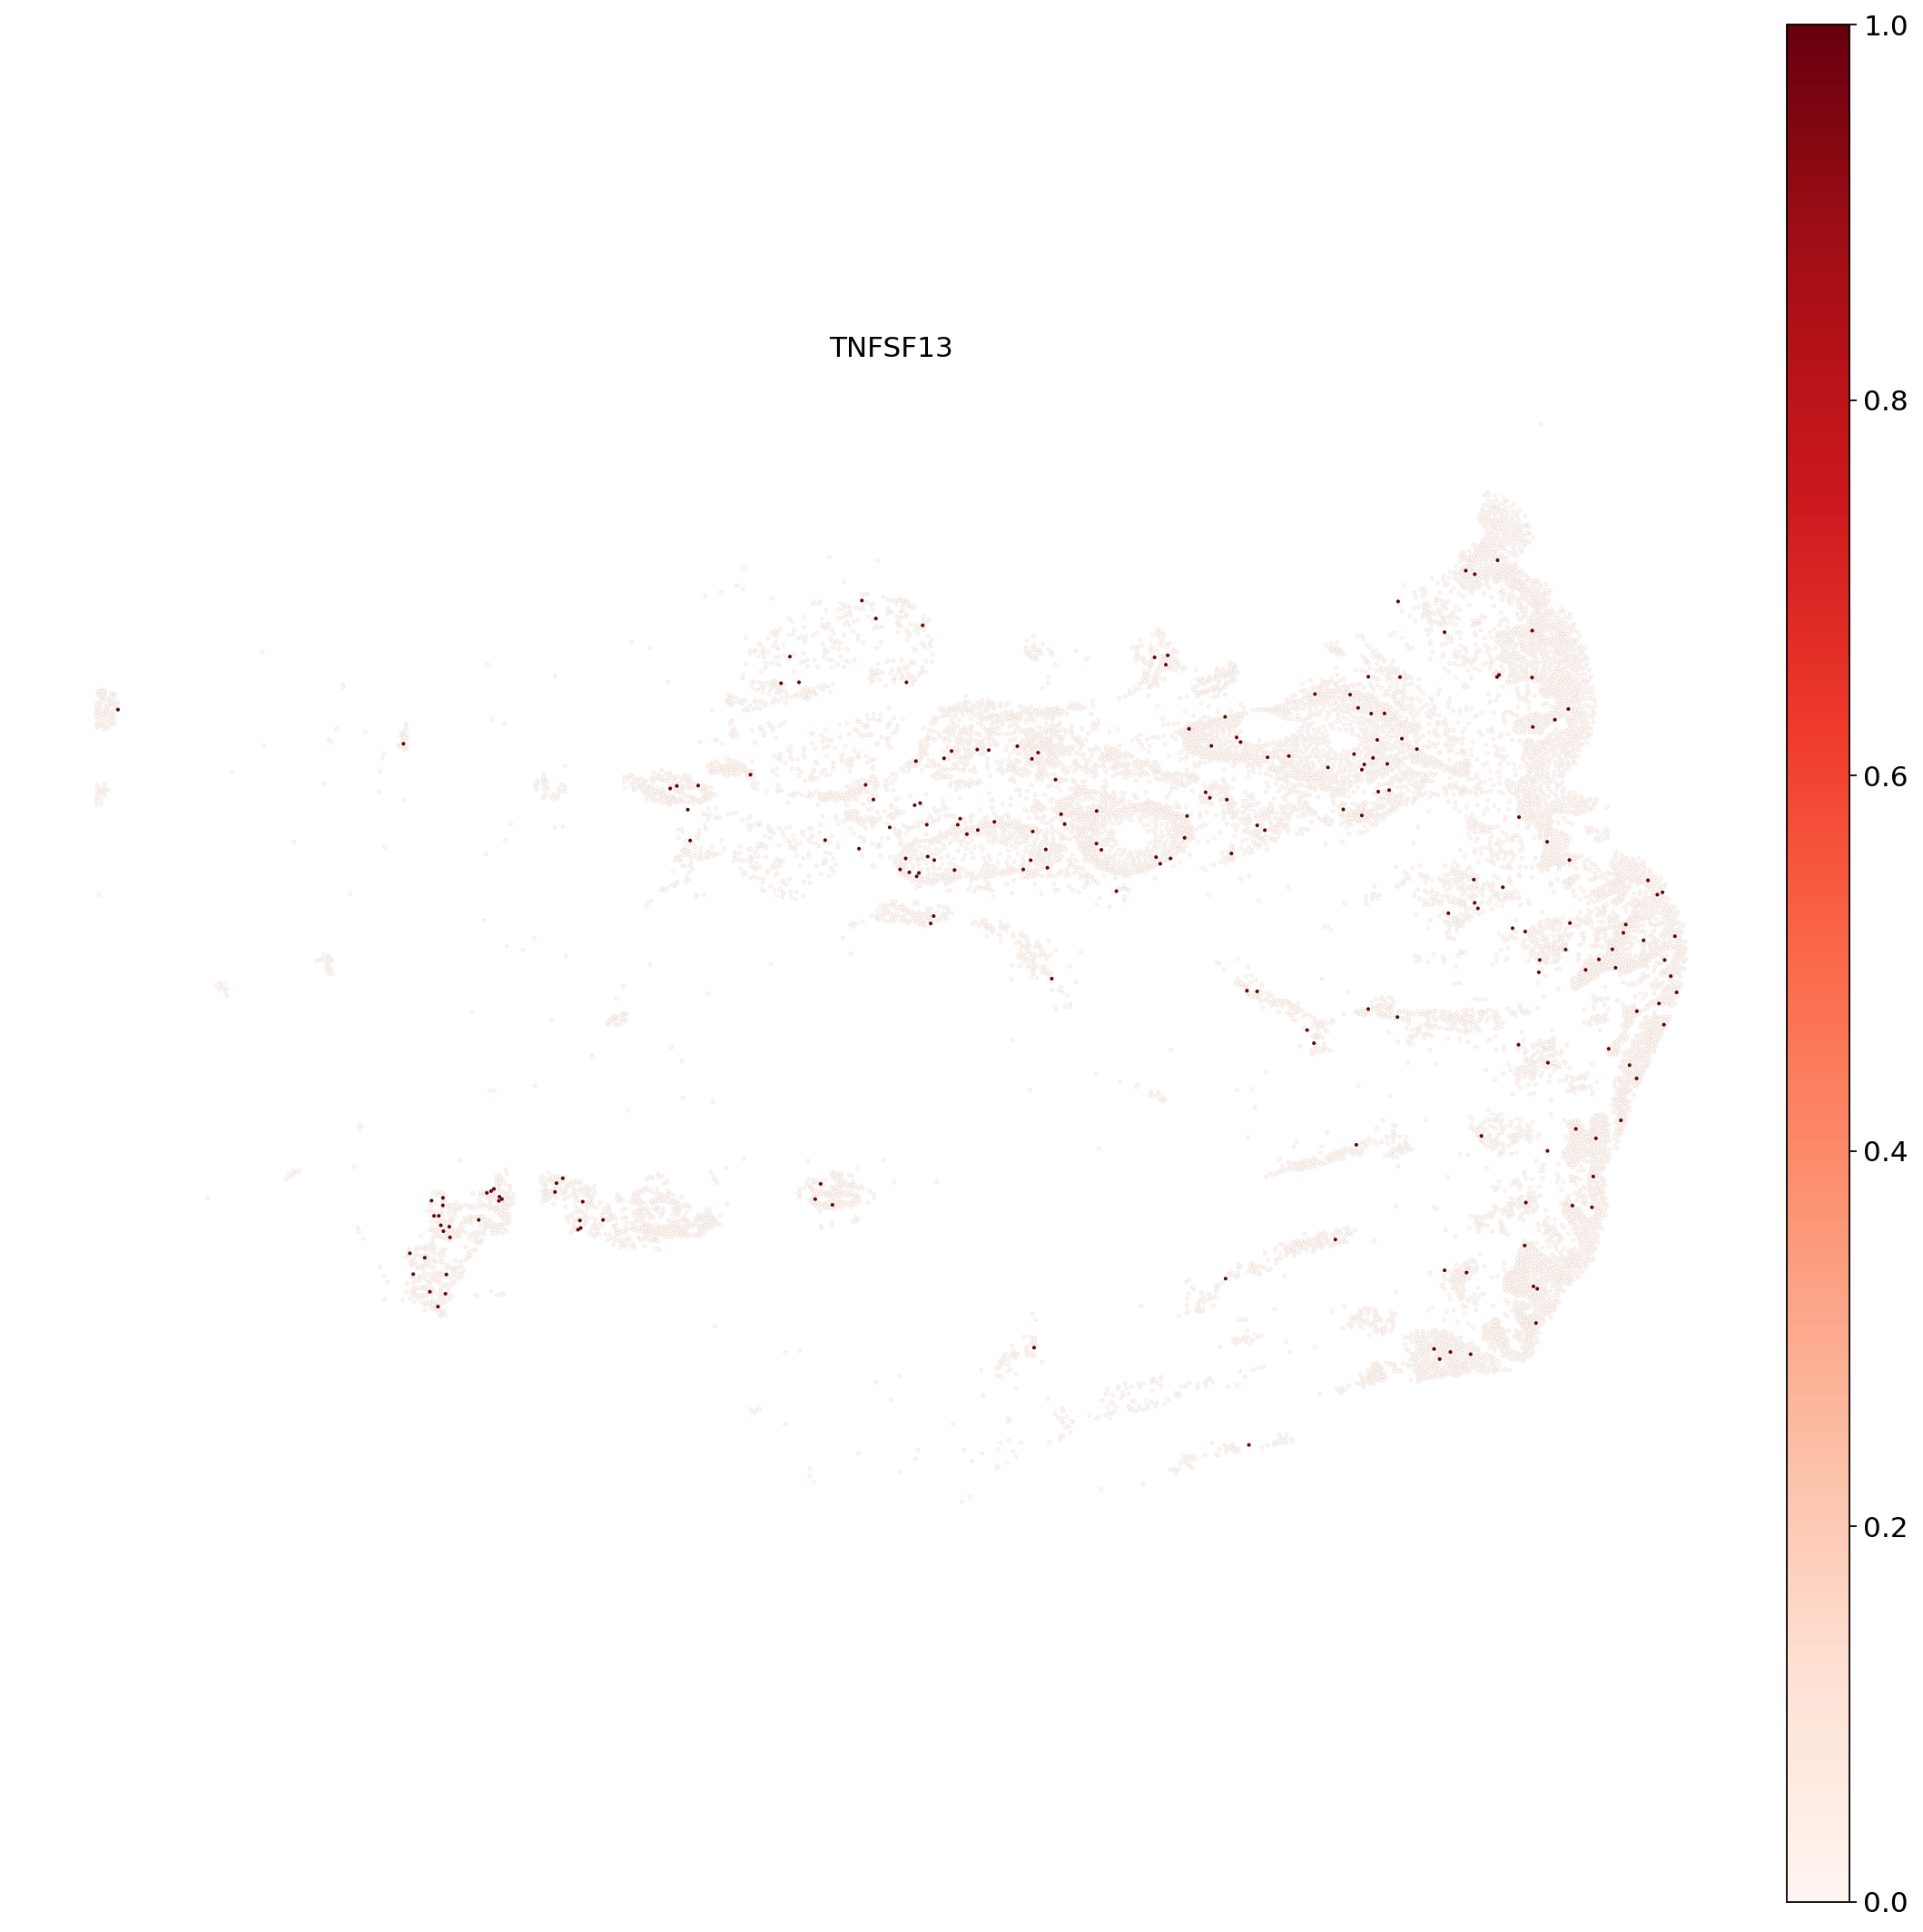

BK27_Lesional Baseline


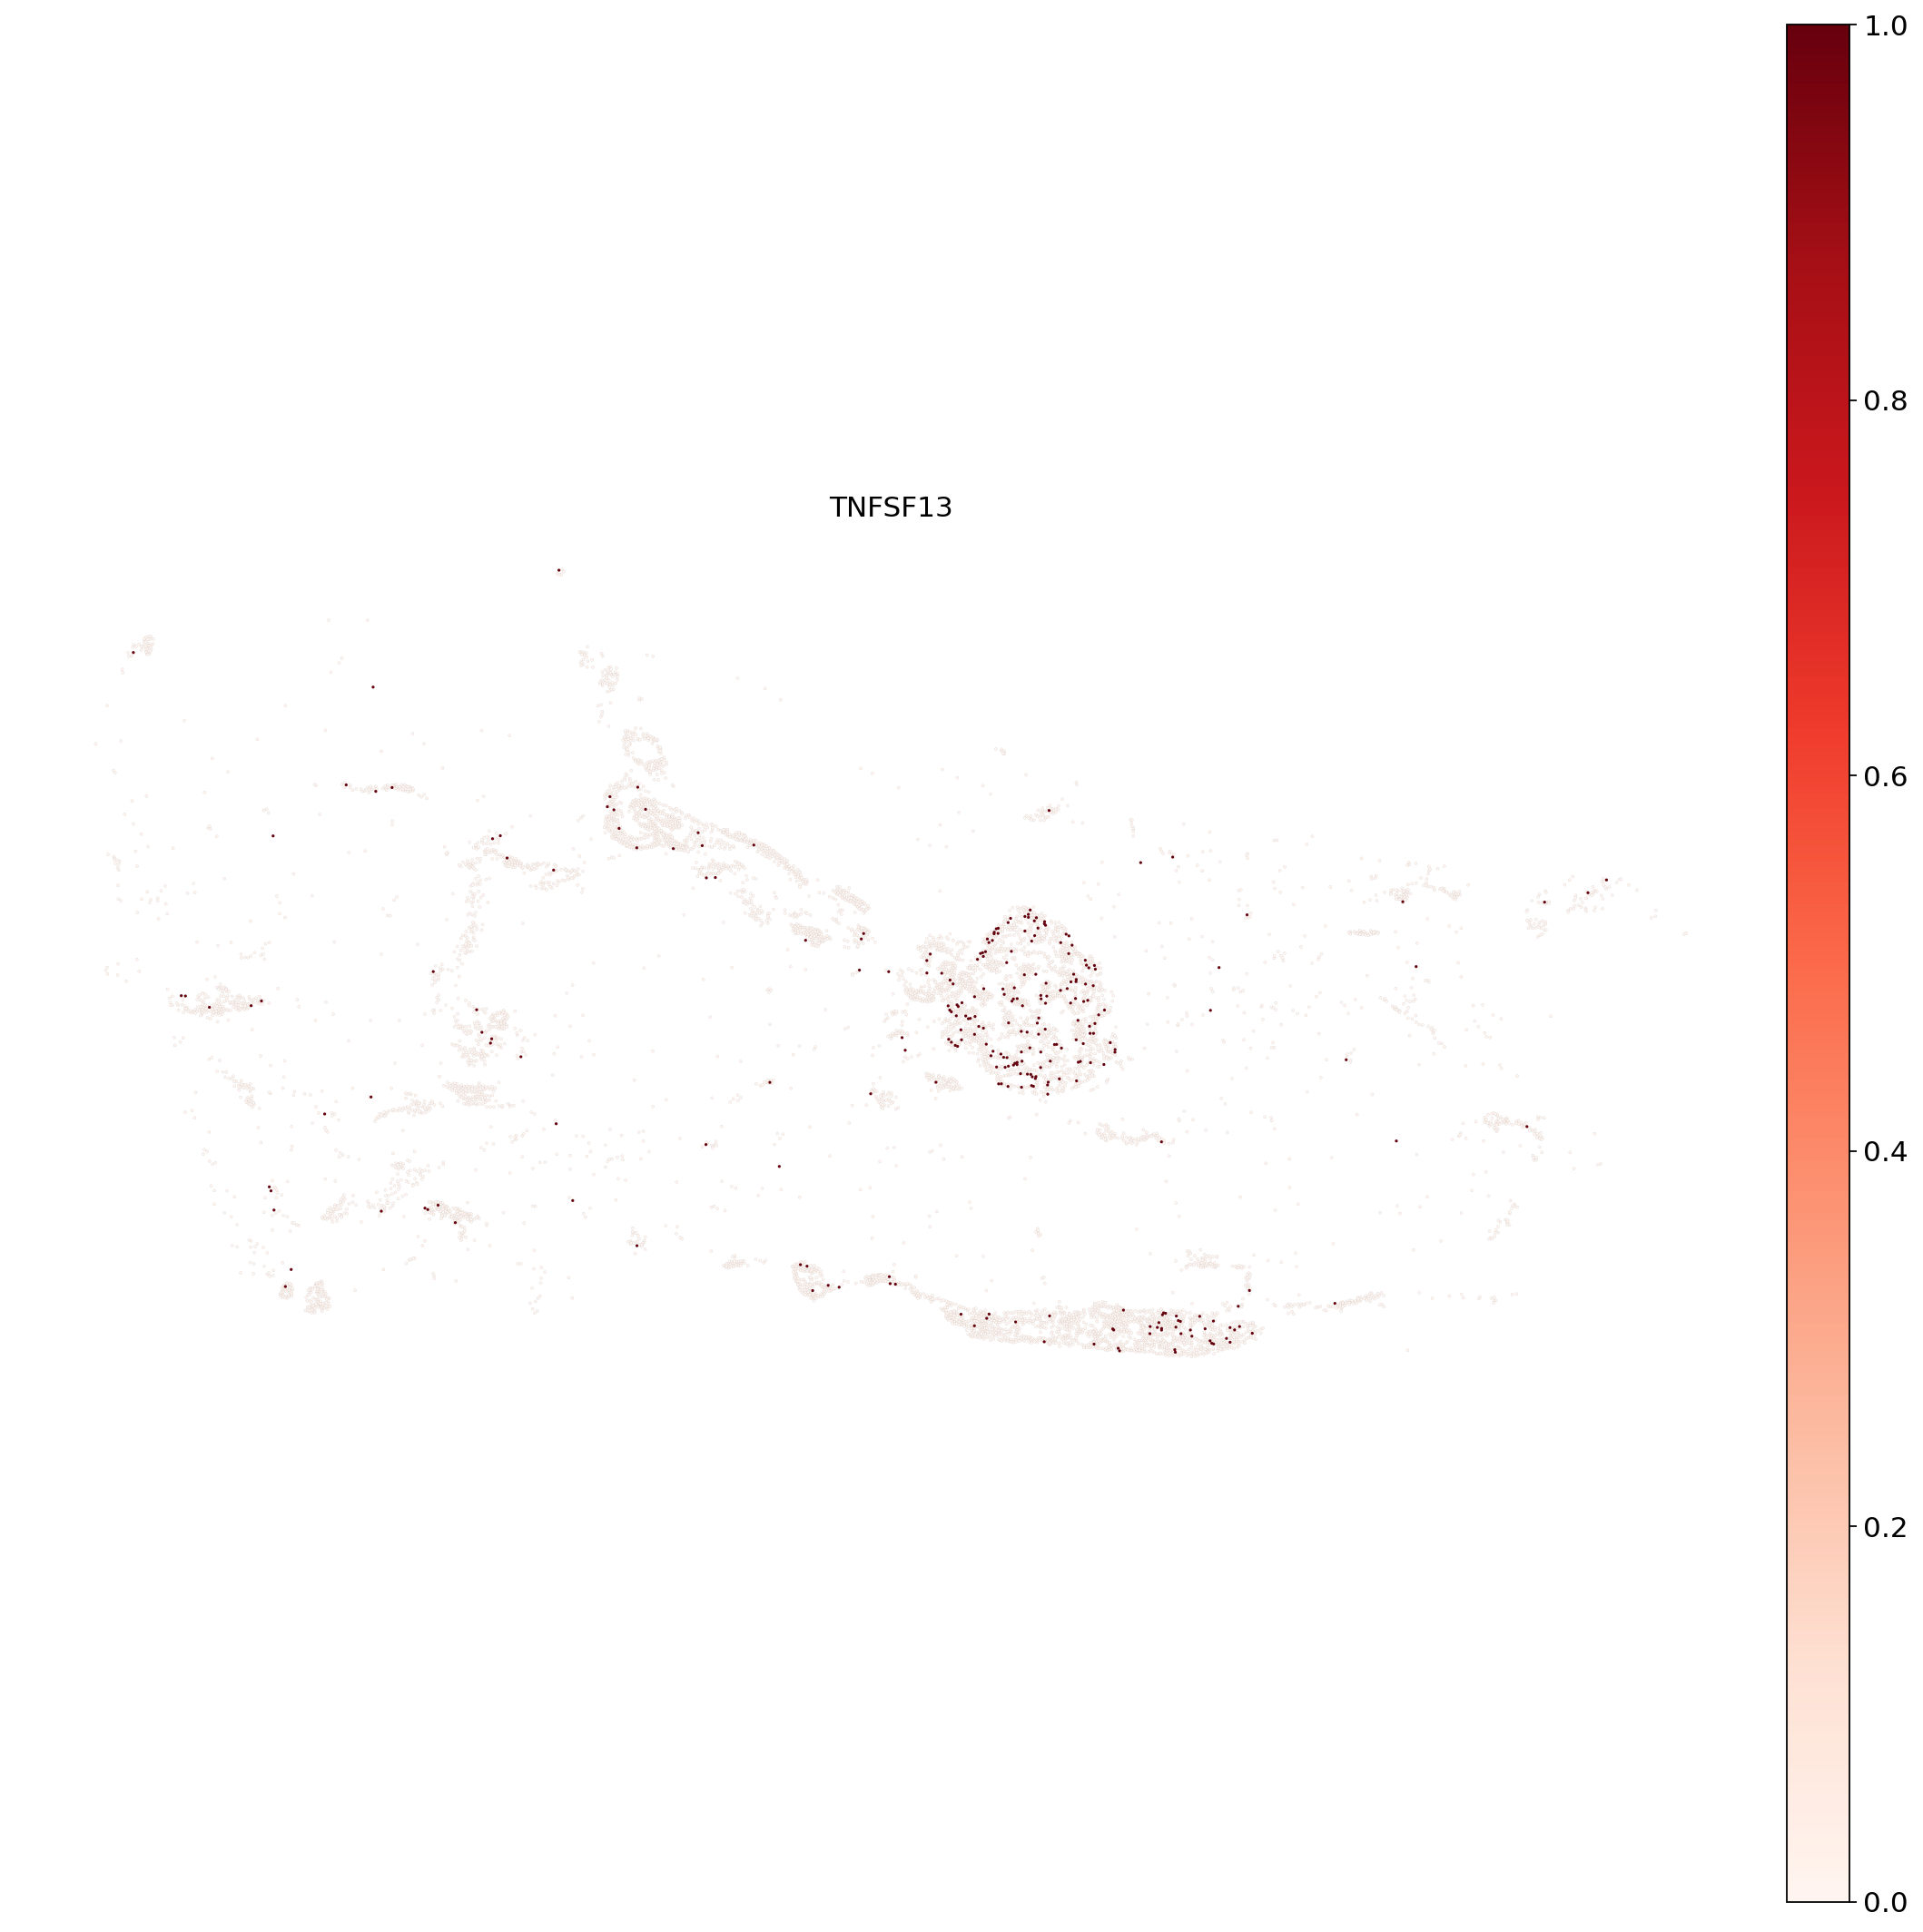

BK24_Lesional Baseline


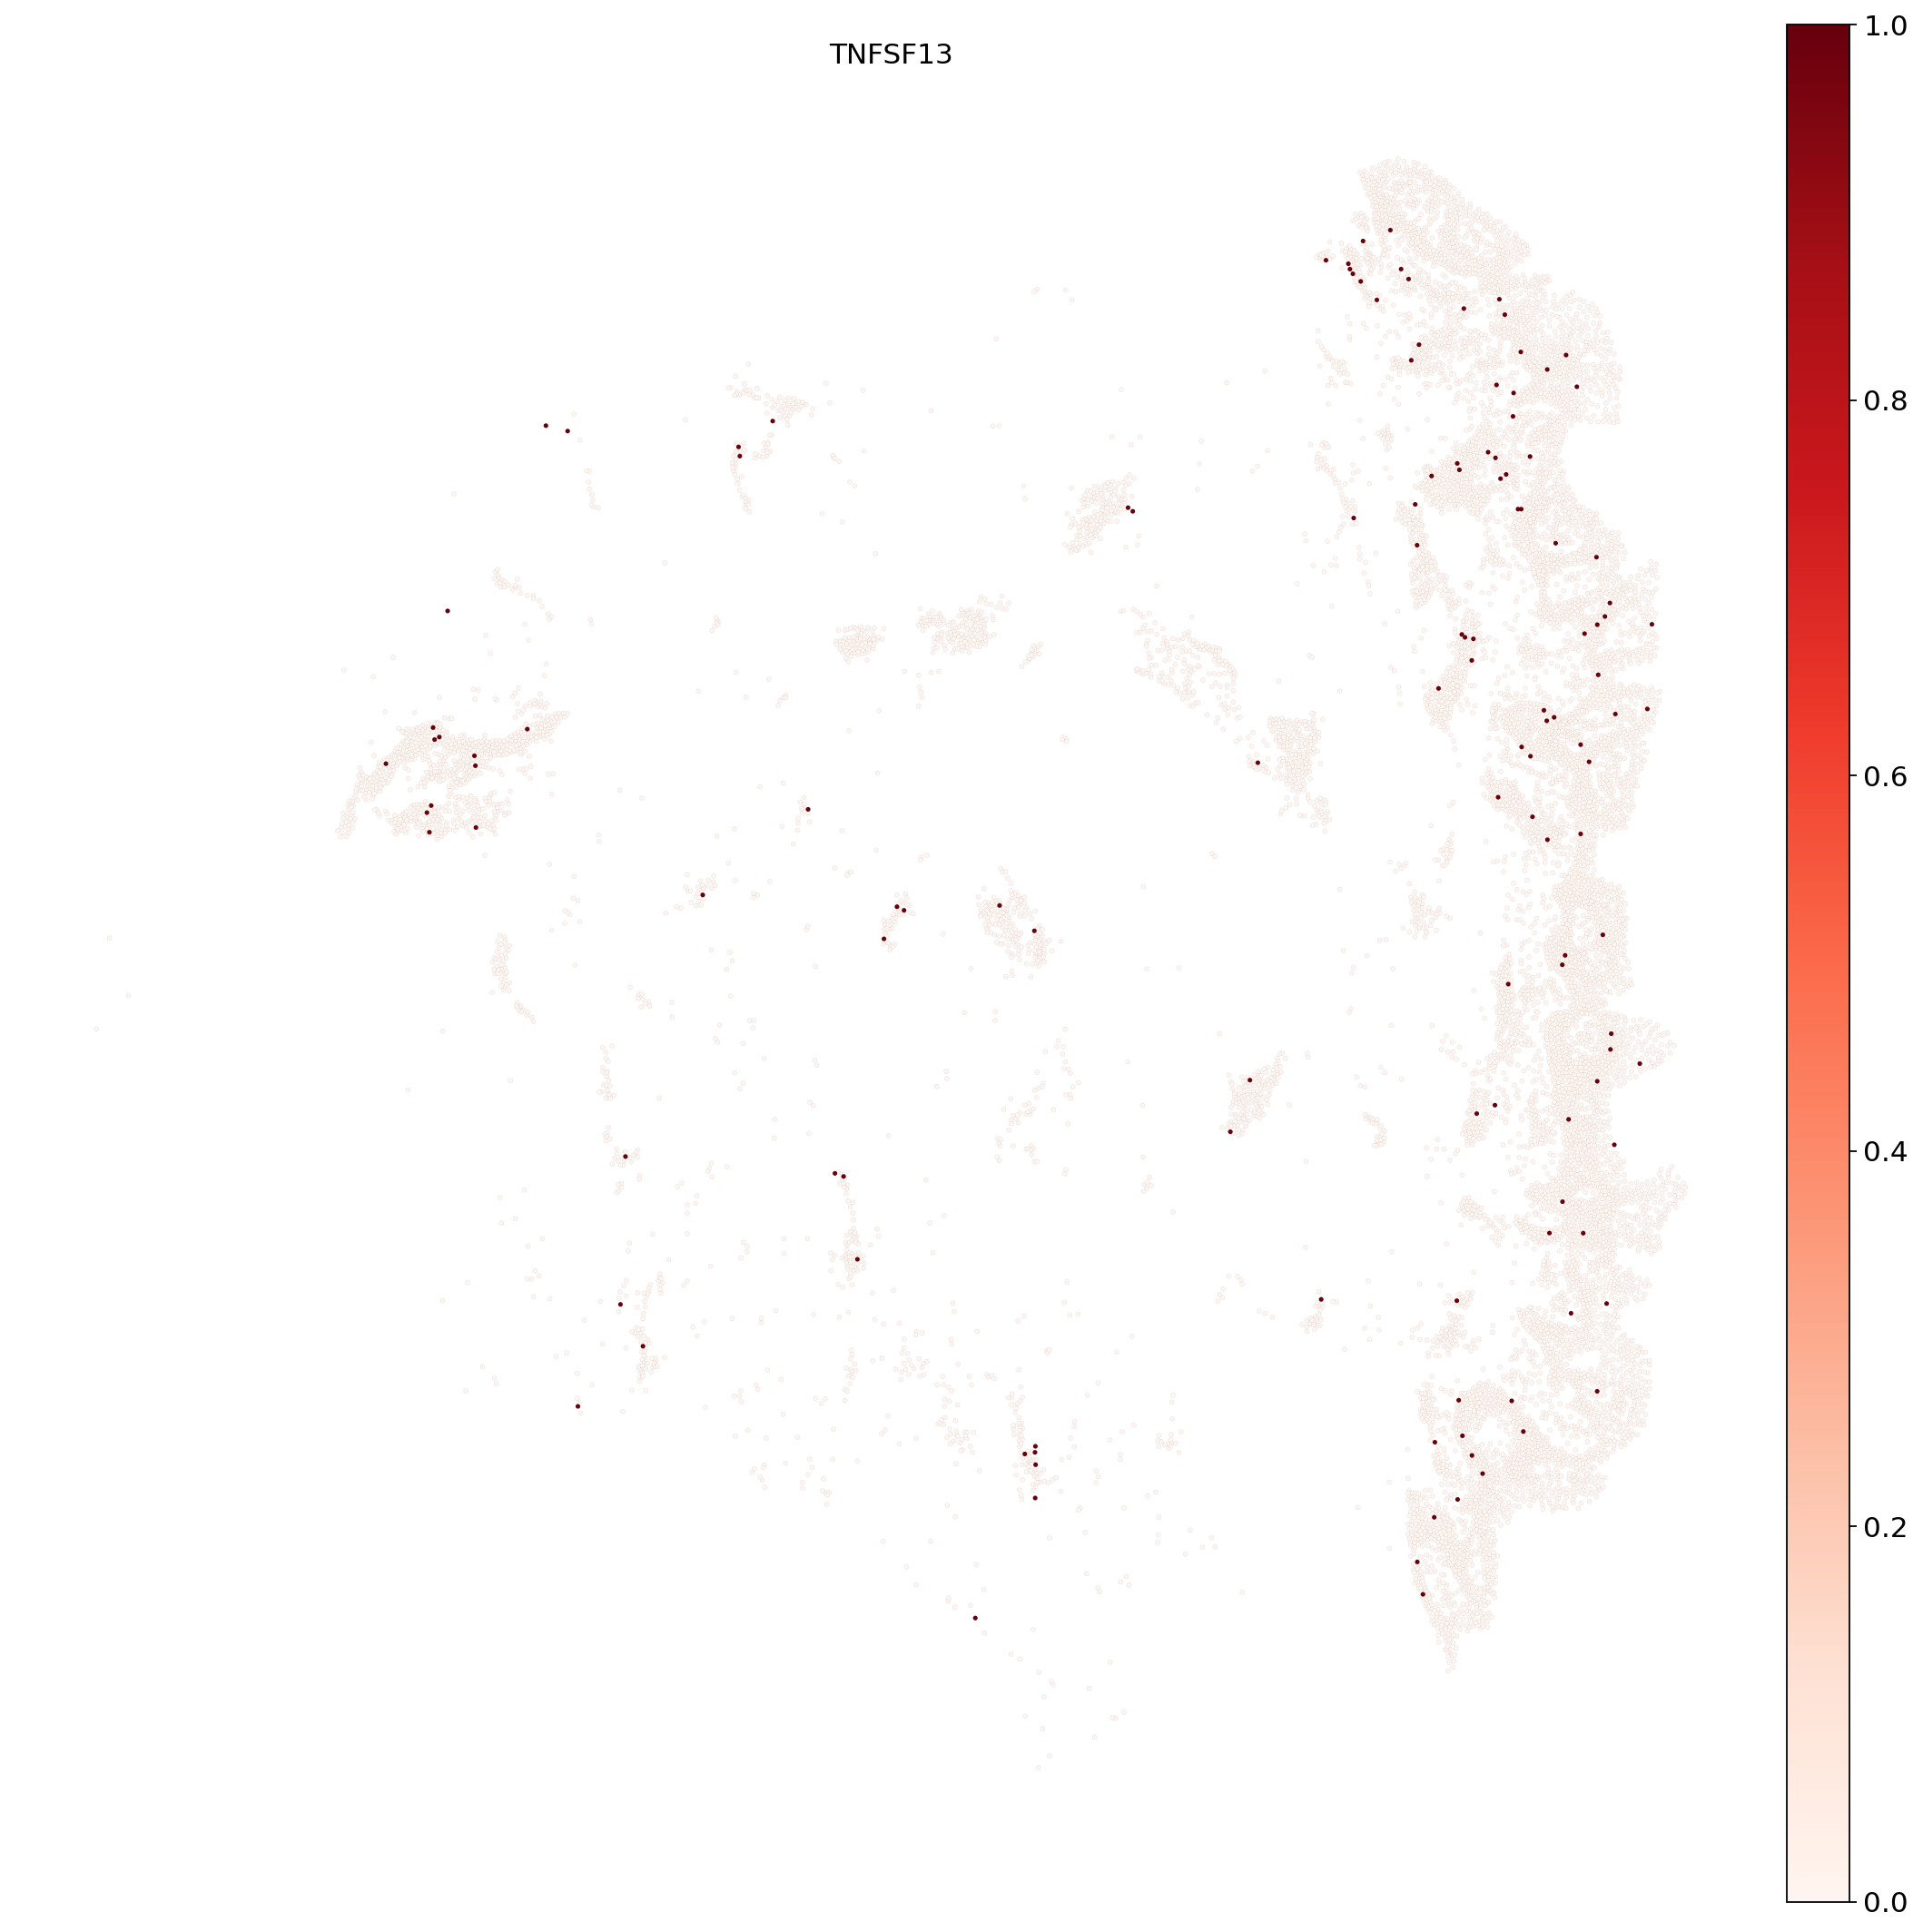

In [28]:
sc.settings.set_figure_params(dpi_save=600, facecolor="white", frameon=False, figsize=(17,17))

NICHE =  'Plasma_cell_rich'
MIN_NUMBER_CELLS=10

CORE_PAPER =["BK23_Week 12",
                                       "BK27_Week 12",
                                      'BK27_Lesional Baseline',
                                         'BK24_Lesional Baseline']
for i, tissue_section_id in enumerate(CORE_PAPER):
    print(tissue_section_id)
   # print(i, "/", len(adata_5k.obs["info_id6"].unique()))
    adata_i =  adata[adata.obs["info_id6"]==tissue_section_id]


    sc.pl.spatial(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
       # library_id="spatial",
      #  shape=None,
        color=["TNFSF13"],
        spot_size=10,
        vmax=1,
                edgecolor="black",
        linewidth=0.02,
                legend_fontsize=12,
      #  title=x,
        legend_loc=None,
           cmap="Reds",
        save=f"plotAPRILspatial_{i}.pdf"
    )
    #     if i>1:
    #         break

 
 
       

In [ ]:
for x in [ 'BK39_Lesional Baseline',  'BK22_Lesional Baseline',
          'Lesional_CE3-SKI-24-FO-1-S22-A1',
        #  'Lesional_Baseline_resolved_CE3-SKI-24-FO-1-S22_replicate',
          # 'Lesional_CE3-SKI-24-FO-1-S22_replicate',
           'Lesional_CE4-SKI-27-FO-4-S22-A2',
      #'Lesional_CE4-SKI-27-FO-4-S22_replicate',

         ]:
    adata_i=adata[adata.obs["info_id6"]==x]

   
    sc.pl.spatial(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
       # library_id="spatial",
      #  shape=None,
        color=["TNFSF13"],
        spot_size=10,
        vmax=1,
                edgecolor="black",
        linewidth=0.05,
                legend_fontsize=12,
      #  title=x,
        legend_loc=None,
           cmap="Reds"
    )
    #     if i>1:
    #         break

 
 


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


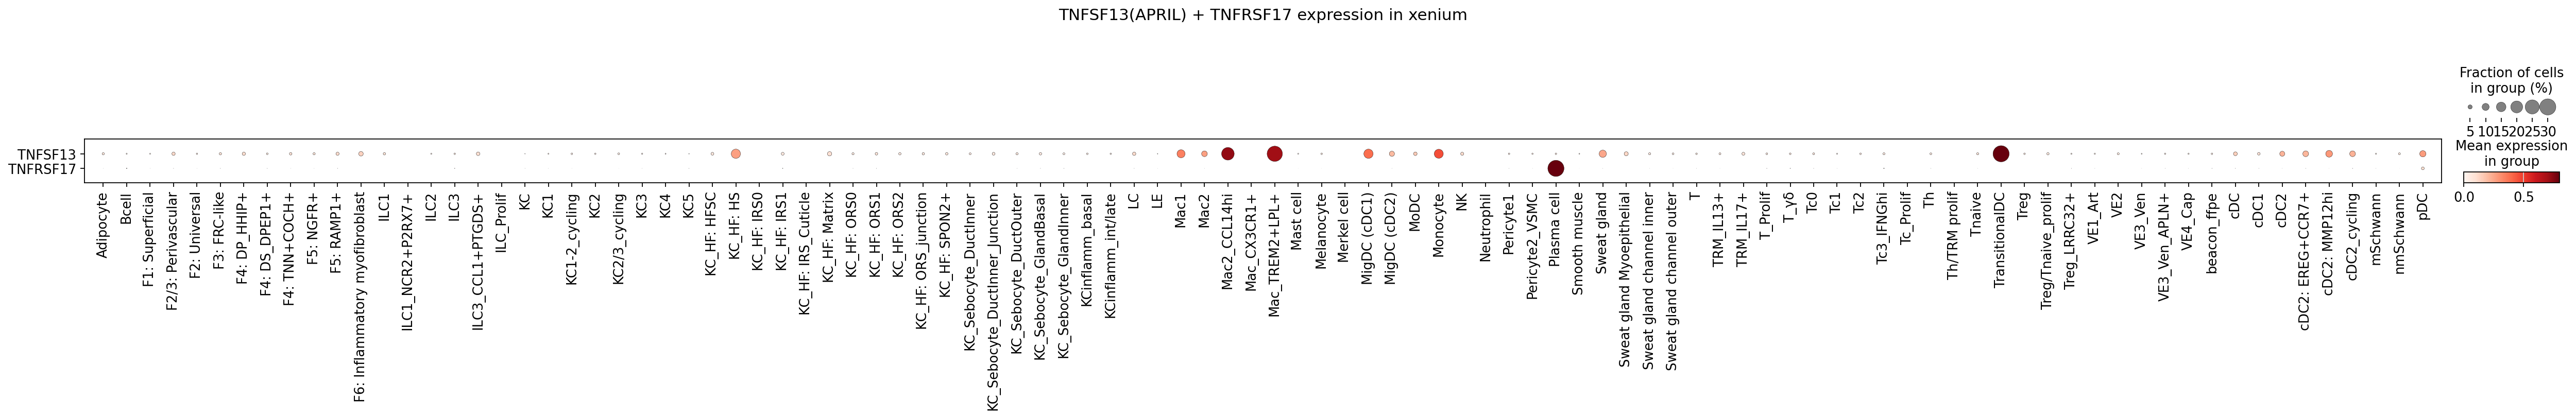

In [47]:
sc.pl.dotplot(
    adata,
     remove_markers([ 'TNFSF13', 
                    'TNFRSF17'
                    ]),
    groupby="lvl5_annotation",
    vmax=0.8,
        dot_max=0.3,
    save='plotTNFRSF17_TNFSF13_xenium.pdf',
    swap_axes=True,
    title="TNFSF13(APRIL) + TNFRSF17 expression in xenium"

  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


In [34]:
adata_plasma=adata[(adata.obs["lvl5_annotation"]=="Plasma cell")|
                  (adata.obs["lvl5_annotation"]=="Bcell")
                  ]
adata_plasma.shape

(1119, 4993)

In [ ]:
adata_plasma.obs["niche19"].value_counts()

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


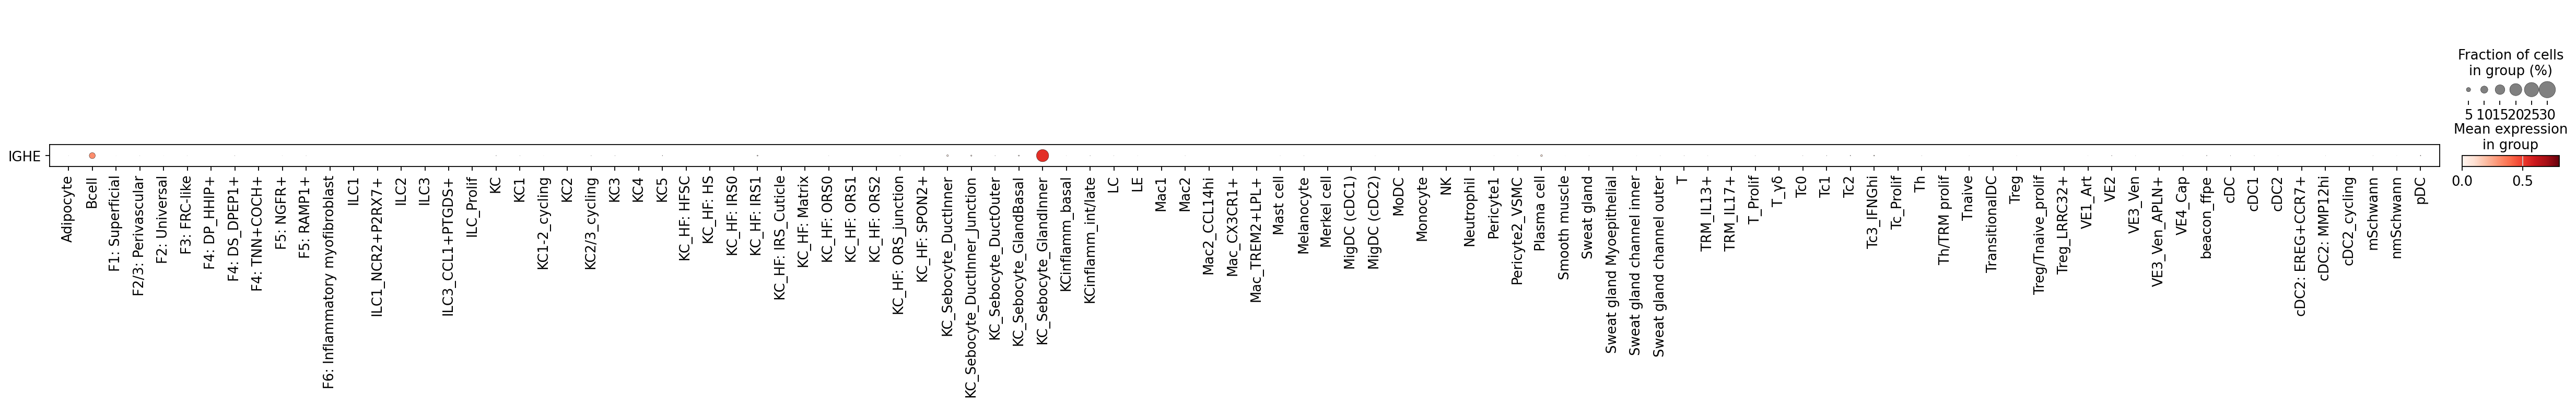

In [40]:
sc.pl.dotplot(
    adata,
     remove_markers([ #'TNFSF13', 
                    #'TNFRSF17', 
                     "IGHE",
                    ]),
    groupby="lvl5_annotation",
    vmax=0.8,
        dot_max=0.3,
    swap_axes=True

  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


In [36]:
niche_counts = adata_plasma.obs["niche19"].value_counts()
valid = niche_counts[niche_counts >= 10].index
adata_plasma = adata_plasma[adata_plasma.obs["niche19"].isin(valid)].copy()
adata_plasma.obs["niche19"] = adata_plasma.obs["niche19"].cat.remove_unused_categories()

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


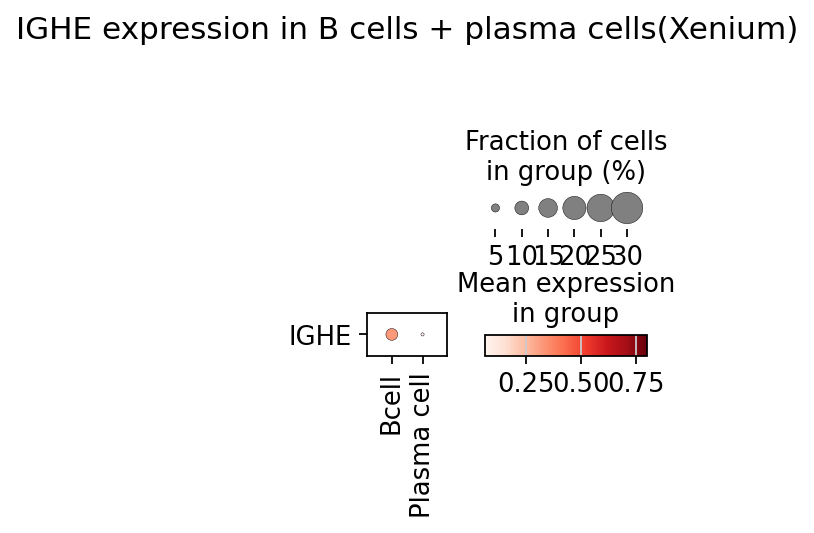

In [46]:
sc.pl.dotplot(
    adata_plasma,#[adata_plasma.obs["lvl5_annotation"]=="Plasma cell"],
     remove_markers([  
                     "IGHE",
                    ]),
    groupby="lvl5_annotation",
    vmax=0.8,
        dot_max=0.3,
    swap_axes=True,
    title="IGHE expression in B cells + plasma cells(Xenium)"

  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


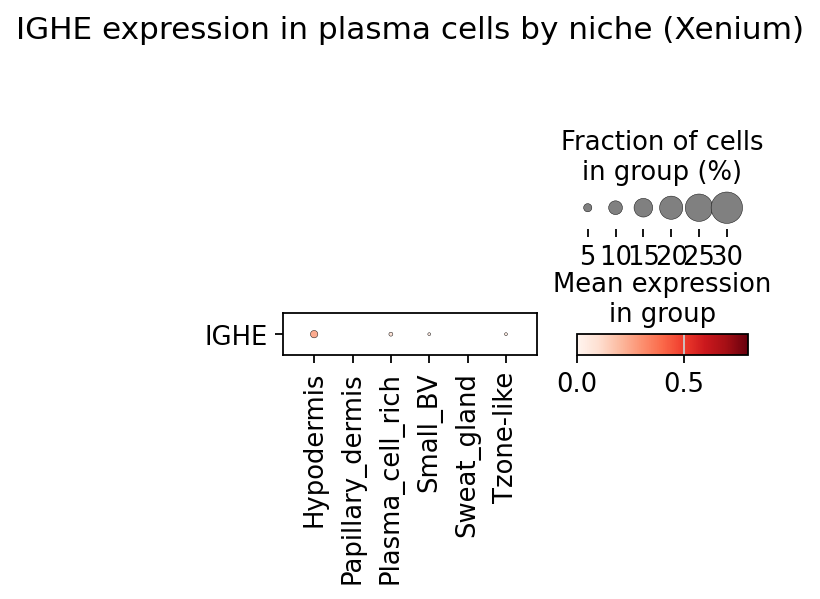

In [45]:
sc.pl.dotplot(
    adata_plasma[adata_plasma.obs["lvl5_annotation"]=="Plasma cell"],
     remove_markers([  
                     "IGHE",
                    ]),
    groupby="niche19",
    vmax=0.8,
        dot_max=0.3,
    swap_axes=True,
        save="IGs_inplasmacell_byniche.pdf",
    title="IGHE expression in plasma cells by niche (Xenium)"


  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


In [ ]:
sc.pl.dotplot(
    adata,
     remove_markers([ 'TNFSF13', 
                    'TNFRSF17', 
                     "IGHE",
                    ]),
    groupby="",
    vmax=0.8,
        dot_max=0.3,
    swap_axes=True

  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


In [ ]:
adata_plasma=adata[(adata.obs["lvl5_annotation"]=="Plasma cell")|
                  (adata.obs["lvl5_annotation"]=="Bcell")
                  ]
adata_plasma.shape


In [9]:
adata_plasma.obs["lvl5_annotation"].value_counts()

lvl5_annotation
Plasma cell    879
Bcell          240
Name: count, dtype: int64

In [14]:
adata_plasma.obs["Site_status"].value_counts()

Site_status
Week 12                             365
Lesional                            244
Non-lesional                        180
3D_Lesional_baseline                104
3D_Week12                            80
Psoriasis_replicate_Lesional         49
Week 8 Psoriasis                     33
Psoriasis_replicate_non-lesional     32
Psoriasis_replicate_PostRx           25
Day 14_HF                             7
Name: count, dtype: int64

In [15]:
adata_plasma_l = adata_plasma[(adata_plasma.obs["Site_status"]=="Week 12")|
                              (adata_plasma.obs["Site_status"]=="Lesional")|
                              (adata_plasma.obs["Site_status"].str.startswith("3D"))|
                               (adata_plasma.obs["Site_status"]=="Psoriasis_replicate_Lesional")
                              
                               ]


In [19]:
adata_plasma_l.obs["t"] = adata_plasma_l.obs["lvl5_annotation"].astype(str)+"_" + adata_plasma_l.obs["Patient_status"].astype(str) + adata_plasma_l.obs["Site_status"].astype(str)

{x:x for x in adata_plasma_l.obs["t"].unique()}



/tmp/ipykernel_149890/3634103096.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_plasma_l.obs["t"] = adata_plasma_l.obs["lvl5_annotation"].astype(str)+"_" + adata_plasma_l.obs["Patient_status"].astype(str) + adata_plasma_l.obs["Site_status"].astype(str)


{'Plasma cell_ADLesional': 'Plasma cell_ADLesional',
 'Bcell_ADLesional': 'Bcell_ADLesional',
 'Bcell_ADWeek 12': 'Bcell_ADWeek 12',
 'Plasma cell_ADWeek 12': 'Plasma cell_ADWeek 12',
 'Plasma cell_PsoriasisLesional': 'Plasma cell_PsoriasisLesional',
 'Bcell_PsoriasisLesional': 'Bcell_PsoriasisLesional',
 'Bcell_nanPsoriasis_replicate_Lesional': 'Bcell_nanPsoriasis_replicate_Lesional',
 'Plasma cell_nanPsoriasis_replicate_Lesional': 'Plasma cell_nanPsoriasis_replicate_Lesional',
 'Bcell_3d_Lesional_baseline3D_Lesional_baseline': 'Bcell_3d_Lesional_baseline3D_Lesional_baseline',
 'Plasma cell_3d_Lesional_baseline3D_Lesional_baseline': 'Plasma cell_3d_Lesional_baseline3D_Lesional_baseline',
 'Bcell_3d_Week123D_Week12': 'Bcell_3d_Week123D_Week12',
 'Plasma cell_3d_Week123D_Week12': 'Plasma cell_3d_Week123D_Week12',
 'Plasma cell_3d_Lesional_baseline3D_Week12': 'Plasma cell_3d_Lesional_baseline3D_Week12',
 'Bcell_3d_Lesional_baseline3D_Week12': 'Bcell_3d_Lesional_baseline3D_Week12'}

In [21]:
adata_plasma_l[adata_plasma_l.obs["t"]== 'Plasma cell_3d_Week123D_Week12'].obs.info_id6.value_counts()

info_id6
3D_BK25_week12-C2         9
3D_BK25_week12-D1orE1a    6
3D_BK25_week12-D2         4
3D_BK25_week12-C1         3
3D_BK25_week12-D1orE1b    2
3D_BK25_week12-A2         1
3D_BK25_week12-B2         1
Name: count, dtype: int64

In [25]:
RENAME = {'Plasma cell_ADLesional': 'Plasma cell_AD_Lesional',
 'Bcell_ADLesional': 'Bcell_AD_Lesional',
 'Bcell_ADWeek 12': 'Bcell_AD_Week12',
 'Plasma cell_ADWeek 12': 'Plasma cell_AD_Week12',
 'Plasma cell_PsoriasisLesional': 'Plasma cell_Psoriasis_Lesional',
 'Bcell_PsoriasisLesional': 'Bcell_Psoriasis_Lesional',
 'Bcell_nanPsoriasis_replicate_Lesional': 'Bcell_Psoriasis_Lesional',
 'Plasma cell_nanPsoriasis_replicate_Lesional': 'Plasma cell_Psoriasis_Lesional',
 'Bcell_3d_Lesional_baseline3D_Lesional_baseline': 'Bcell_AD_Lesional',
 'Plasma cell_3d_Lesional_baseline3D_Lesional_baseline': 'Plasma cell_AD_Lesional',
 'Bcell_3d_Week123D_Week12': 'Bcell_AD_Week12',
 'Plasma cell_3d_Week123D_Week12': 'Plasma cell_AD_Week12',
 'Plasma cell_3d_Lesional_baseline3D_Week12': 'Plasma cell_AD_Week12',
 'Bcell_3d_Lesional_baseline3D_Week12': 'Bcell_AD_Week12'}
adata_plasma_l.obs["t2"]=adata_plasma_l.obs["t"].map(RENAME)
adata_plasma_l.obs["t2"].value_counts()
# exclude = ['Bcell_nanPsoriasis_replicate_Lesional',
           
#           ]
# adata_plasma_l=adata_plasma_l[~adata_plasma_l.obs["t"].isin(exclude)]

t2
Plasma cell_AD_Week12             382
Plasma cell_AD_Lesional           217
Bcell_AD_Lesional                  85
Bcell_AD_Week12                    63
Plasma cell_Psoriasis_Lesional     51
Bcell_Psoriasis_Lesional           44
Name: count, dtype: int64

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


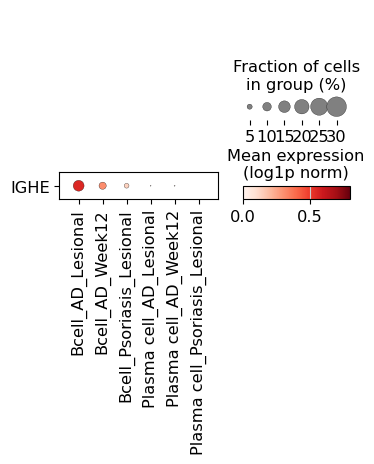

In [34]:
heavy_genes = ["IGHM", "IGHD", "IGHG1", "IGHG2", "IGHG3", "IGHG4", "IGHA1", "IGHA2", "IGHE"]
sc.pl.dotplot(
    adata_plasma_l,
     remove_markers(heavy_genes),
    groupby="t2",
    vmax=0.8,
    swap_axes=True,
     dot_max=0.3,

    save='plotIGS_xenium.pdf',
    colorbar_title='Mean expression\n(log1p norm)'

)


In [29]:
adata_plasma_l.obs.niche19.value_counts()

niche19
Plasma_cell_rich            315
Small_BV                    213
Tzone-like                  171
Papillary_dermis             93
Hypodermis                   21
Sweat_gland                  10
Reticular_dermis              5
Sweat_gland_channel           4
EpidermisInflamm_mid          2
Large_BV                      2
Muscle                        2
Perineural                    2
Reticular_dermis_LE_rich      1
Sebaceous_duct                1
Name: count, dtype: int64

In [32]:
niche_counts = adata_plasma_l.obs["niche19"].value_counts()
valid = niche_counts[niche_counts >= 10].index
adata_plasma_l = adata_plasma_l[adata_plasma_l.obs["niche19"].isin(valid)].copy()
adata_plasma_l.obs["niche19"] = adata_plasma_l.obs["niche19"].cat.remove_unused_categories()

/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


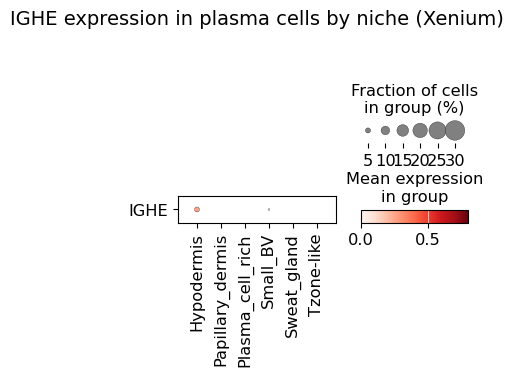

In [35]:
sc.pl.dotplot(
    adata_plasma_l[adata_plasma_l.obs["lvl5_annotation"]=="Plasma cell"],
     remove_markers([  
                     "IGHE",
                    ]),
    groupby="niche19",
    vmax=0.8,
        dot_max=0.3,
    swap_axes=True,
       # save="IGs_inplasmacell_byniche.pdf",
    title="IGHE expression in plasma cells by niche (Xenium)",
    save="IGs_by_niche.pdf"

  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


/software/cellgen/team298/ls34/vqgraph/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


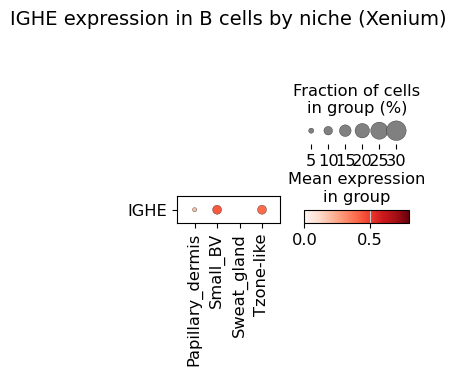

In [37]:
sc.pl.dotplot(
    adata_plasma_l[adata_plasma_l.obs["lvl5_annotation"]=="Bcell"],
     remove_markers([  
                     "IGHE",
                    ]),
    groupby="niche19",
    vmax=0.8,
        dot_max=0.3,
    swap_axes=True,
     save="IGs_inBcell_byniche.pdf",
    title="IGHE expression in B cells by niche (Xenium)"


  #  save='supp16_plasma_Cell_dotplot1_XENIUM_allcells.pdf'
)


### 